In [50]:
import sys
sys.path.insert(0, '../../backend/src')

# import matplotlib
%matplotlib widget
import matplotlib

plt = matplotlib.pyplot

import numpy as np
import pandas as pd
from utils import s3, constants, utils, db

In [51]:
archive = s3.fetch_archive_data()
archive = utils.prep_archive_for_training(archive)
archive = archive.set_index(pd.to_datetime(archive['ds'])).drop(columns=['ds'])
print(archive)

                     snow  snowdepth  cloudcover  precip    airtemp          y
ds                                                                            
2020-09-08 03:00:00   0.0        0.0    0.000000    0.00  60.500000  69.080002
2020-09-08 04:00:00   0.0        0.0    0.000000    0.00  61.099998  68.540001
2020-09-08 05:00:00   0.0        0.0    0.000000    0.00  59.200001  68.180000
2020-09-08 06:00:00   0.0        0.0    0.000000    0.00  60.000000  67.639999
2020-09-08 07:00:00   0.0        0.0    9.600000    0.00  58.900002  67.099998
...                   ...        ...         ...     ...        ...        ...
2023-09-09 19:00:00   0.0        0.0   12.600000    0.00  81.300003  70.339996
2023-09-09 20:00:00   0.0        0.0   12.600000    0.00  81.300003  70.519997
2023-09-09 21:00:00   0.0        0.0   81.900002    0.02  72.599998  70.699997
2023-09-09 22:00:00   0.0        0.0   81.900002    0.02  72.599998  70.699997
2023-09-09 23:00:00   0.0        0.0   81.900002    

In [52]:
last_fcst_entry = db.get_latest_fcst_entry(constants.USGS_SITE)
fcst = db.get_entire_fcst(constants.USGS_SITE, last_fcst_entry['origin'])
fcst = pd.DataFrame(fcst)
fcst = fcst.set_index(pd.to_datetime(fcst['timestamp'].apply(pd.to_numeric), unit='s')).sort_index()
fcst = fcst.drop(columns=['usgs_site', 'origin', 'timestamp', 'usgs_site#type', 'origin#timestamp', 'type']).apply(pd.to_numeric)
print(fcst)

hist = db.get_n_most_recent_hist_entries(constants.USGS_SITE, constants.FORECAST_HORIZON*2)
hist = pd.DataFrame(hist)
hist = hist.set_index(pd.to_datetime(hist['timestamp'].apply(pd.to_numeric), unit='s')).sort_index()
hist = hist.drop(columns=['usgs_site', 'timestamp', 'usgs_site#type', 'type']).apply(pd.to_numeric)
print(hist)

                     snow  snowdepth  watertemp_5th  cloudcover  precip  \
timestamp                                                                 
2023-09-15 13:00:00   0.0        0.0          61.20         6.0     0.0   
2023-09-15 14:00:00   0.0        0.0          62.14         6.0     0.0   
2023-09-15 15:00:00   0.0        0.0          62.95         7.0     0.0   
2023-09-15 16:00:00   0.0        0.0          63.40         8.0     0.0   
2023-09-15 17:00:00   0.0        0.0          63.84        10.0     0.0   
...                   ...        ...            ...         ...     ...   
2023-09-22 08:00:00   0.0        0.0          60.36        42.7     0.0   
2023-09-22 09:00:00   0.0        0.0          60.12        46.0     0.0   
2023-09-22 10:00:00   0.0        0.0          59.98        48.7     0.0   
2023-09-22 11:00:00   0.0        0.0          59.62        51.3     0.0   
2023-09-22 12:00:00   0.0        0.0          59.41        54.0     0.0   

                     str

<Axes: xlabel='timestamp'>

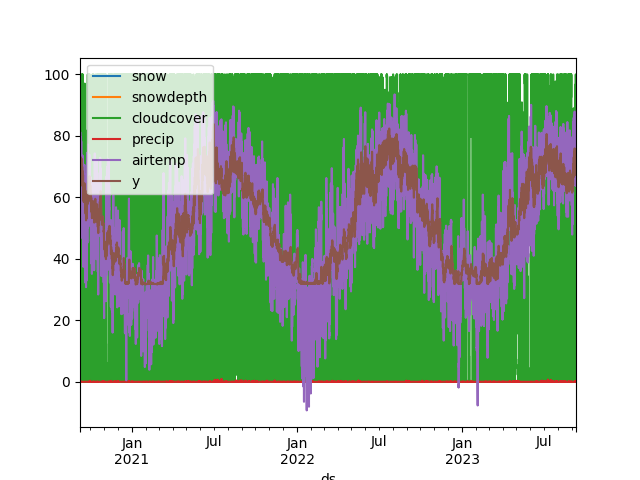

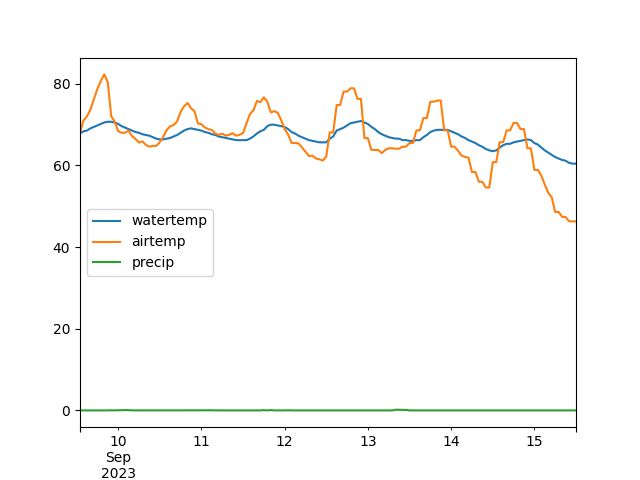

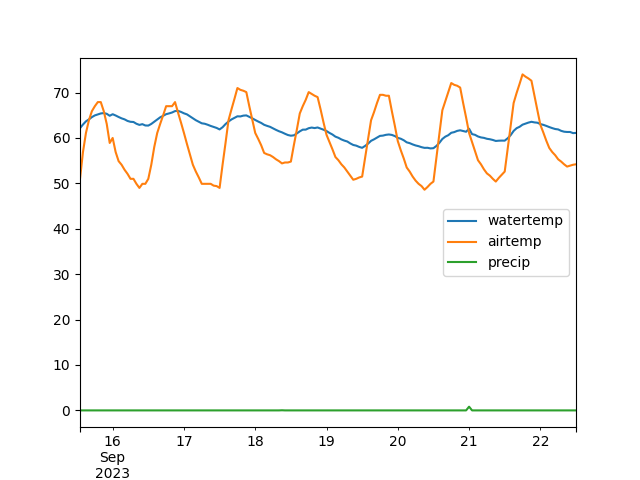

In [53]:
archive.plot()
hist[['watertemp', 'airtemp', 'precip']].plot()
fcst[['watertemp', 'airtemp', 'precip']].plot()